In [1]:
import pandas as pd
df = pd.read_excel('CWC final preview.xlsx')
print(df)

      Club  Goals  Goals per 90     xG   xG per 90  Positional attacks   
0  Chelsea     14          2.33   9.84        1.64               31.33  \
1      PSG     16          2.66  10.77        1.77               36.70   

   Positional attacks  with shots  Shots per 90  Shots on target  Passes  ...   
0                           0.271            15            0.400   591.0  ...  \
1                           0.258            14            0.429   686.6  ...   

   Average Possession %  Recoveries per 90  Duels per 90  Duels won per 90   
0                0.6157              65.67        168.00             0.507  \
1                0.7260             167.00        179.77             0.475   

   Conceded goals per 90  Shots against per 90  Defensive duels won per 90   
0                   0.83                   8.0                       0.629  \
1                   0.14                   6.8                       0.626   

   Aerial duels won per 90  Interceptions per 90  Clearances pe

Chelsea in Possession – Volume, Control, and Growing Edge

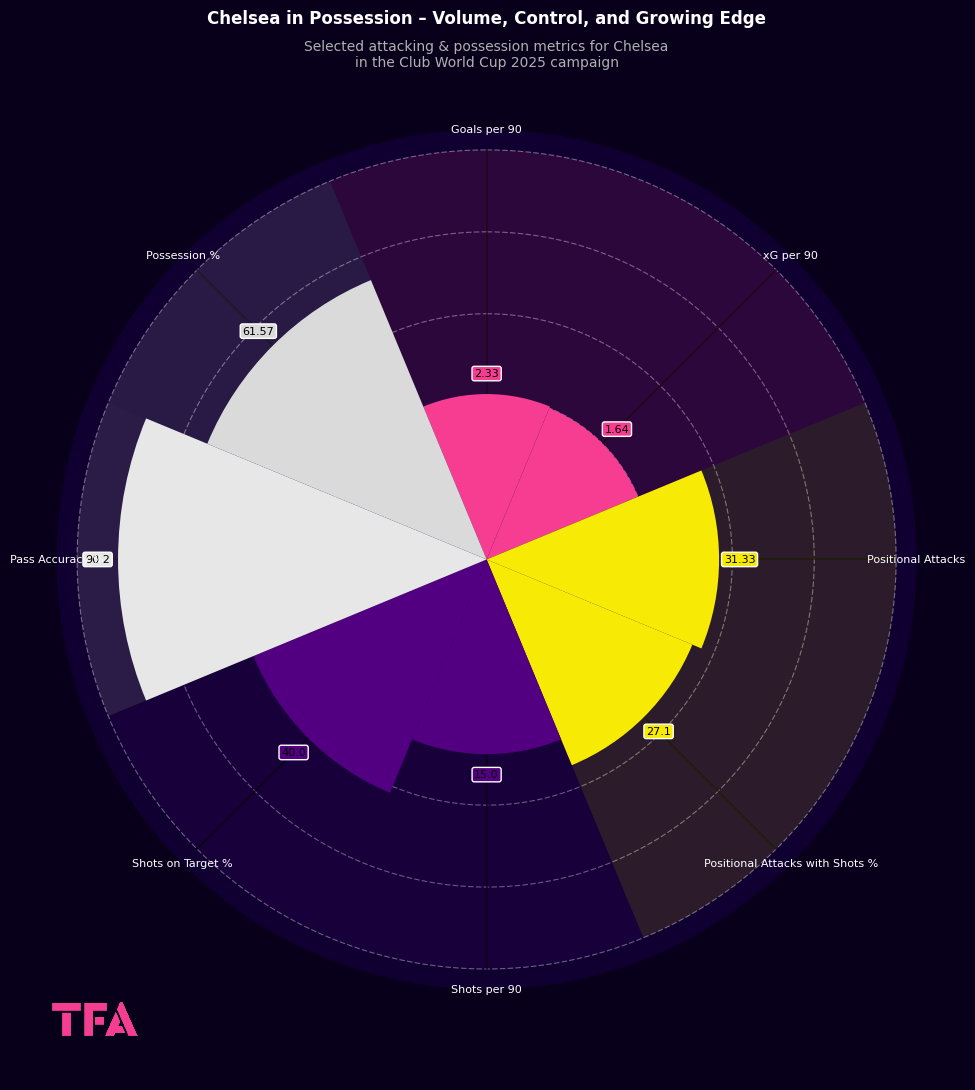

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Metric": [
        "Goals per 90", "xG per 90", "Positional Attacks", 
        "Positional Attacks with Shots %", "Shots per 90", 
        "Shots on Target %", "Pass Accuracy %", "Possession %"
    ],
    "Value": [2.33, 1.64, 31.33, 27.1, 15, 40, 90.2, 61.57]
}

df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
values = df["Normalized"].tolist()
values += values[:1]

colors_map = {
    "Goals per 90": "#F73D92",
    "xG per 90": "#F73D92",
    "Shots per 90": "#520081",
    "Shots on Target %": "#520081",
    "Positional Attacks": "#F7EB06",
    "Positional Attacks with Shots %": "#F7EB06",
    "Possession %": "#DADADA",
    "Pass Accuracy %": "#E7E7E7"
}
colors = [colors_map[metric] for metric in df["Metric"]]
colors += [colors[0]]

angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black' if colors[i] != '#FFFFFF' else 'black',
        zorder=4
    )

    ax.text(
        angles[i],
        1.05,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Chelsea in Possession – Volume, Control, and Growing Edge",
             color='white', fontsize=12, weight='bold', y=1.08)

plt.text(0.5, 1.035,
         "Selected attacking & possession metrics for Chelsea\nin the Club World Cup 2025 campaign",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()


Chelsea Without the Ball – Discipline in Structure, Still Room for Bite

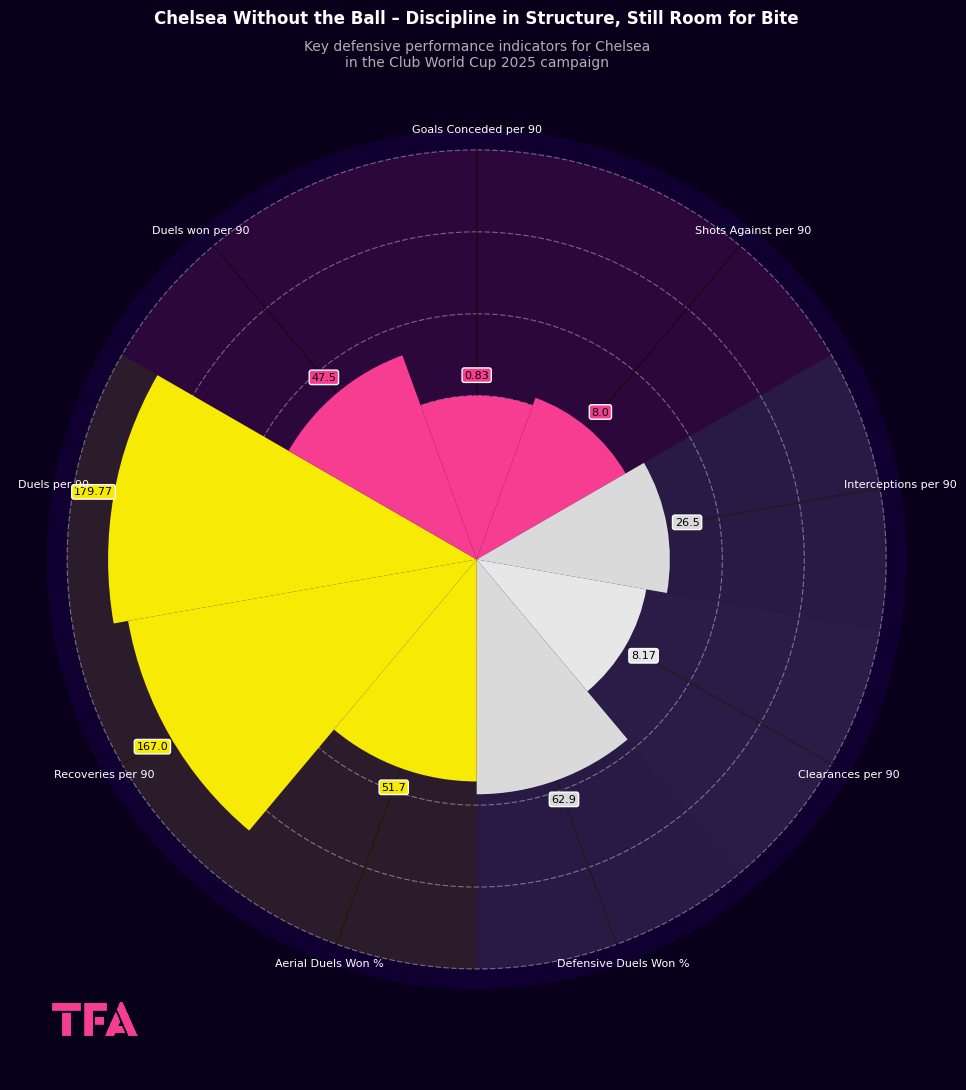

In [28]:
data = {
    "Metric": [
        "Goals Conceded per 90", "Shots Against per 90", "Interceptions per 90", "Clearances per 90" , "Defensive Duels Won %", 
        "Aerial Duels Won %", 'Recoveries per 90', 'Duels per 90', 'Duels won per 90'
    ],
    "Value": [0.83, 8, 26.5, 8.17 , 62.9, 51.7, 167, 179.77, 47.5]
}

df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
values = df["Normalized"].tolist()
values += values[:1]

colors_map = {
    "Goals Conceded per 90": "#F73D92",
    "Shots Against per 90": "#F73D92",
    "Defensive Duels Won %": "#DADADA",
    "Aerial Duels Won %": "#F7EB06",
    "Interceptions per 90": "#DADADA",
    "Clearances per 90": "#E7E7E7",
    "Recoveries per 90": "#F7EB06",
    "Duels per 90": "#F7EB06",
    'Duels won per 90': "#F73D92"
}
colors = [colors_map[metric] for metric in df["Metric"]]
colors += [colors[0]]

angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black' if colors[i] != '#FFFFFF' else 'black',
        zorder=4
    )

    ax.text(
        angles[i],
        1.05,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Chelsea Without the Ball – Discipline in Structure, Still Room for Bite",
             color='white', fontsize=12, weight='bold', y=1.08)

plt.text(0.5, 1.035,
         "Key defensive performance indicators for Chelsea\nin the Club World Cup 2025 campaign",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()


PSG in Possession – Tactical Supremacy with a Dual Threat

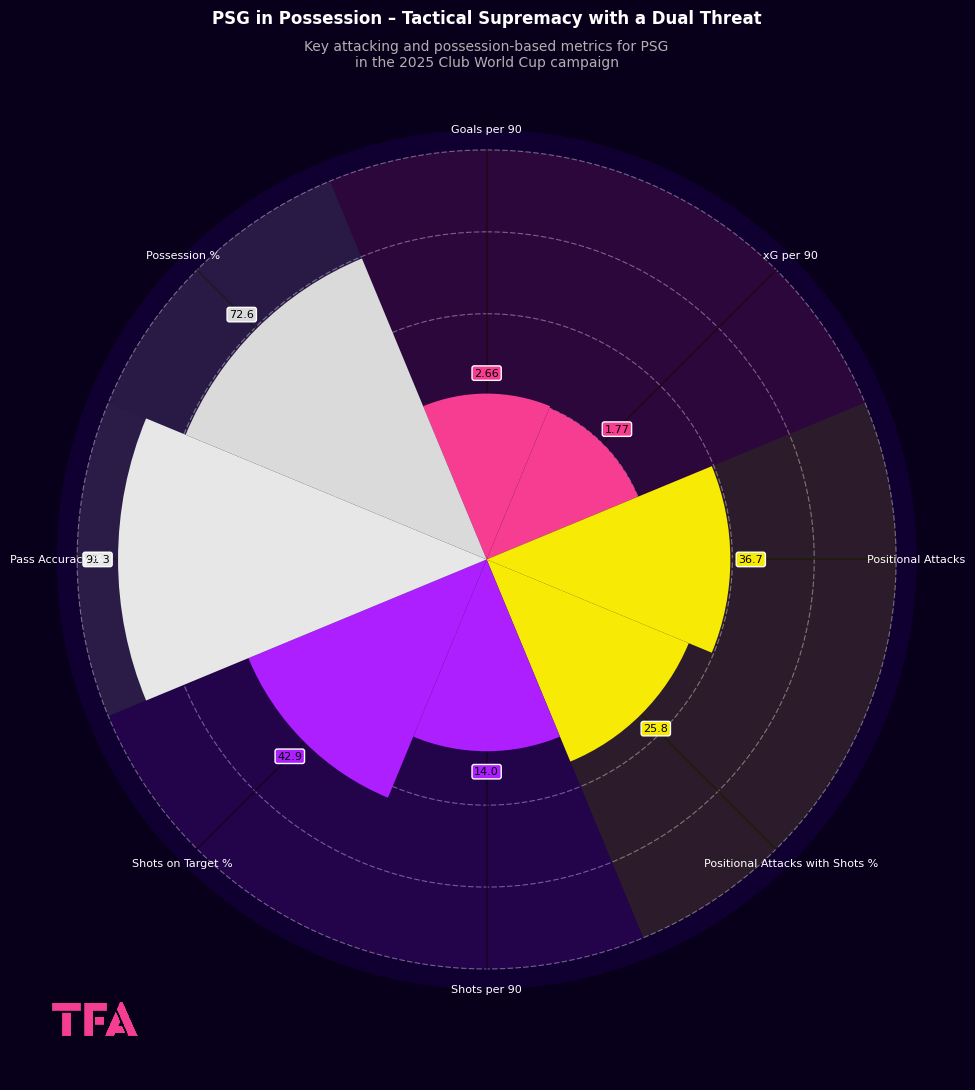

In [30]:
data = {
    "Metric": [
        "Goals per 90", "xG per 90", "Positional Attacks", 
        "Positional Attacks with Shots %", "Shots per 90", 
        "Shots on Target %", "Pass Accuracy %", "Possession %"
    ],
    "Value": [2.66, 1.77, 36.7, 25.8, 14, 42.9, 91.3, 72.6]
}

df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
values = df["Normalized"].tolist()
values += values[:1]

colors_map = {
    "Goals per 90": "#F73D92",
    "xG per 90": "#F73D92",
    "Shots per 90": "#AD1FFF",
    "Shots on Target %": "#AD1FFF",
    "Positional Attacks": "#F7EB06",
    "Positional Attacks with Shots %": "#F7EB06",
    "Possession %": "#DADADA",
    "Pass Accuracy %": "#E7E7E7"
}
colors = [colors_map[metric] for metric in df["Metric"]]
colors += [colors[0]]

angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black' if colors[i] != '#FFFFFF' else 'black',
        zorder=4
    )

    ax.text(
        angles[i],
        1.05,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("PSG in Possession – Tactical Supremacy with a Dual Threat",
             color='white', fontsize=12, weight='bold', y=1.08)

plt.text(0.5, 1.035,
         "Key attacking and possession-based metrics for PSG\nin the 2025 Club World Cup campaign",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()


PSG Without the Ball – Compact, Organised, and Statistically Elite

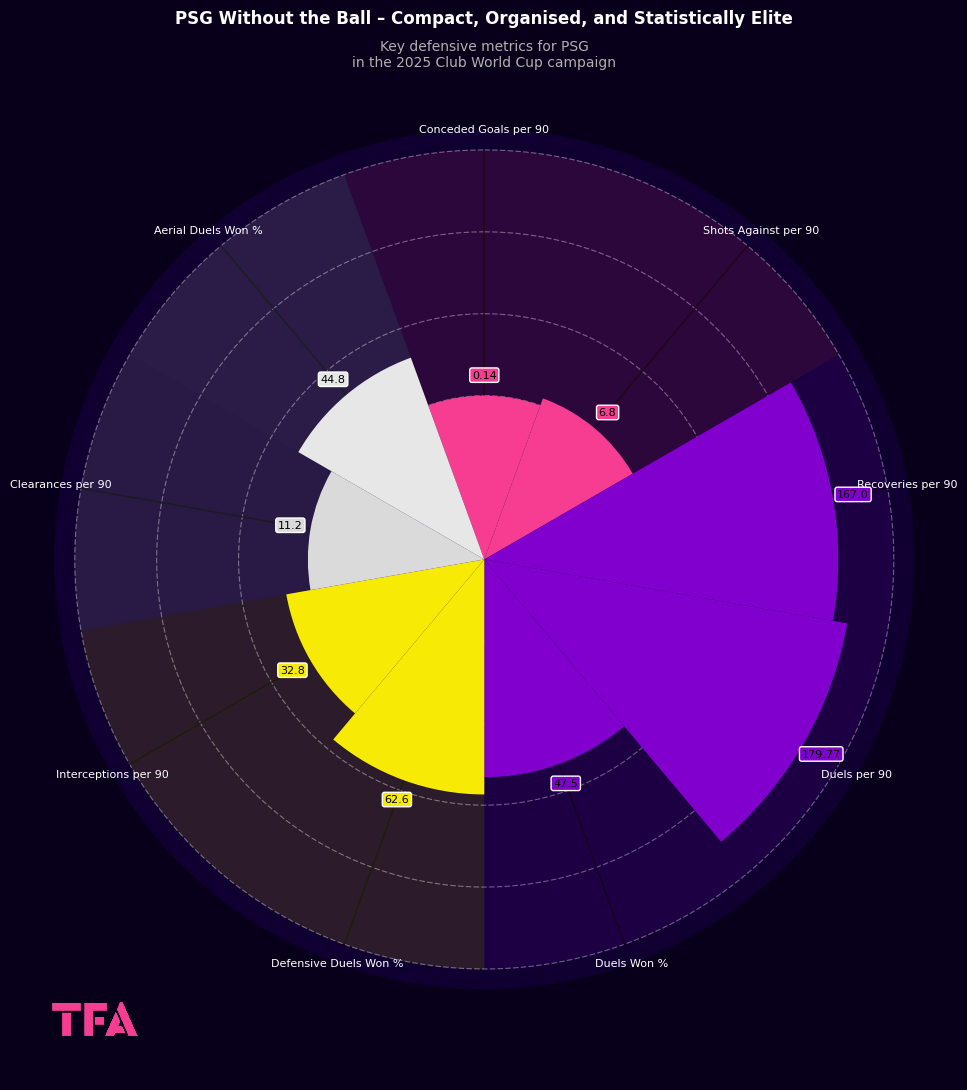

In [33]:
data = {
    "Metric": [
        "Conceded Goals per 90", "Shots Against per 90", "Recoveries per 90",
        "Duels per 90", "Duels Won %", "Defensive Duels Won %",
        "Interceptions per 90", "Clearances per 90", "Aerial Duels Won %"
    ],
    "Value": [0.14, 6.8, 167, 179.77, 47.5, 62.6, 32.8, 11.2, 44.8]
}

df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])
values = df["Normalized"].tolist()
values += values[:1]

colors_map = {
    "Conceded Goals per 90": "#F73D92",
    "Shots Against per 90": "#F73D92",
    "Recoveries per 90": "#8200CE",
    "Duels per 90": "#8200CE",
    "Duels Won %": "#8200CE",
    "Defensive Duels Won %": "#F7EB06",
    "Interceptions per 90": "#F7EB06",
    "Clearances per 90": "#DADADA",
    "Aerial Duels Won %": "#E7E7E7"
}
colors = [colors_map[metric] for metric in df["Metric"]]
colors += [colors[0]]

angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        values[i] + 0.05,
        f"{df['Value'][i]}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black' if colors[i] != '#FFFFFF' else 'black',
        zorder=4
    )

    ax.text(
        angles[i],
        1.05,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("PSG Without the Ball – Compact, Organised, and Statistically Elite",
             color='white', fontsize=12, weight='bold', y=1.08)

plt.text(0.5, 1.035,
         "Key defensive metrics for PSG\nin the 2025 Club World Cup campaign",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()


Attacking Efficiency & Shot Selection – Chelsea vs PSG

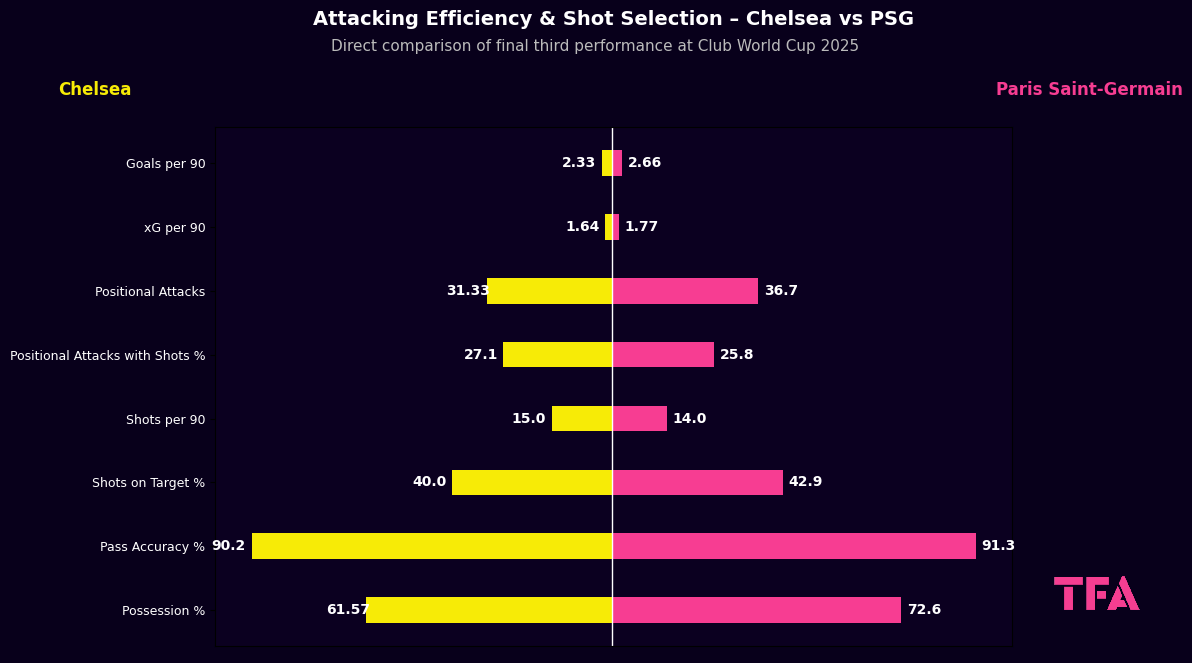

In [99]:
data = {
    "Metric": [
        "Goals per 90", "xG per 90", "Positional Attacks",
        "Positional Attacks with Shots %", "Shots per 90",
        "Shots on Target %", "Pass Accuracy %", "Possession %"
    ],
    "Chelsea": [2.33, 1.64, 31.33, 27.1, 15, 40, 90.2, 61.57],
    "PSG": [2.66, 1.77, 36.7, 25.8, 14, 42.9, 91.3, 72.6]
}

df = pd.DataFrame(data)
df = df[::-1]

fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#0B0020")

y_pos = range(len(df))

ax.barh(y_pos, df["Chelsea"], color="#F7EB06", height=0.4, align='center')
ax.barh(y_pos, [-val for val in df["PSG"]], color="#F73D92", height=0.4, align='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(df["Metric"], color="white", fontsize=9)
ax.tick_params(axis='x', colors='white')
ax.axvline(0, color='white', linewidth=1)

for i, val in enumerate(df["Chelsea"]):
    ax.text(val + 10, i, f"{val}", va='center', ha='left', color='white', fontsize=10, weight='bold')

for i, val in enumerate(df["PSG"]):
    ax.text(-val - 10, i, f"{val}", va='center', ha='right', color='white', fontsize=10, weight='bold')

ax.text(-max(df["PSG"]) - 5, len(df), "Paris Saint-Germain", ha='left', va='bottom', color="#F73D92", fontsize=12, weight='bold')
ax.text(max(df["Chelsea"]) + 30, len(df), "Chelsea", ha='right', va='bottom', color="#F7EB06", fontsize=12, weight='bold')

ax.set_xticks([])
ax.invert_xaxis()

plt.title("Attacking Efficiency & Shot Selection – Chelsea vs PSG", color="white", fontsize=14, weight='bold', y=1.18)
plt.suptitle("Direct comparison of final third performance at Club World Cup 2025", y=0.89, fontsize=11, color="#BBBBBB")

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.20)
    ab = AnnotationBbox(imagebox, (0.96, 0.02), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Possession Profiles & Out-of-Possession Intensity – Chelsea vs PSG

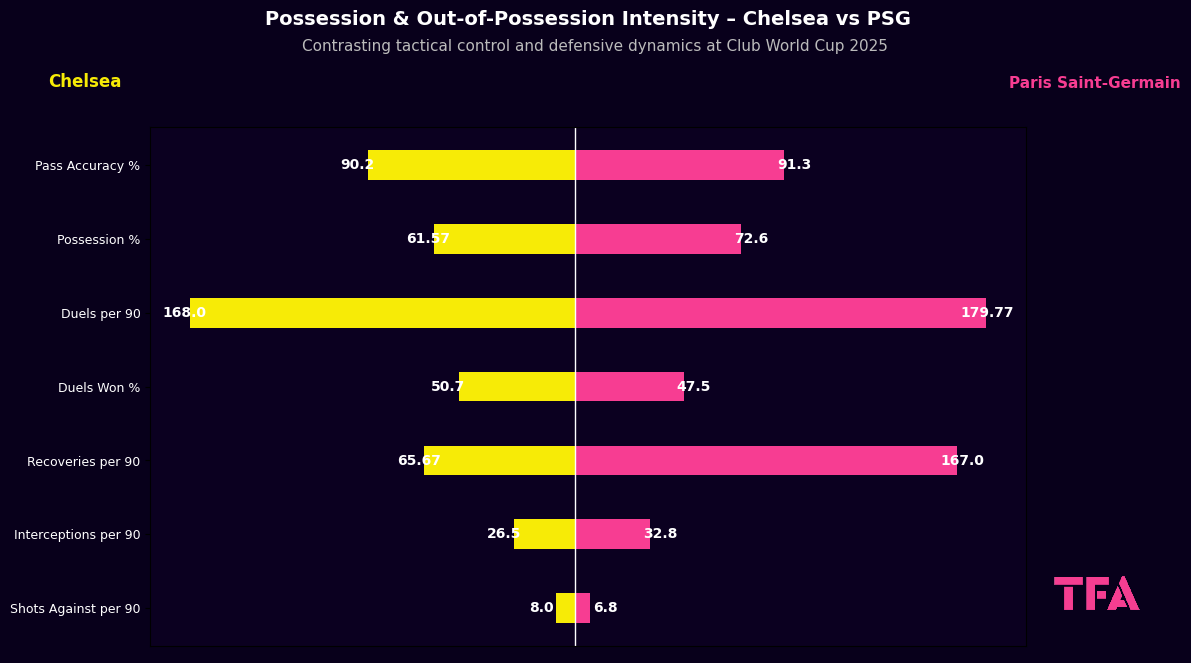

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

data = {
    "Metric": [
        "Pass Accuracy %", "Possession %",
        "Duels per 90", "Duels Won %",
        "Recoveries per 90", "Interceptions per 90", "Shots Against per 90"
    ],
    "Chelsea": [90.2, 61.57, 168, 50.7, 65.67, 26.5, 8],
    "PSG": [91.3, 72.6, 179.77, 47.5, 167, 32.8, 6.8]
}

df = pd.DataFrame(data)
df = df[::-1]

fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#0B0020")

y_pos = range(len(df))

ax.barh(y_pos, df["Chelsea"], color="#F7EB06", height=0.4, align='center')
ax.barh(y_pos, [-val for val in df["PSG"]], color="#F73D92", height=0.4, align='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(df["Metric"], color="white", fontsize=9)
ax.tick_params(axis='x', colors='white')
ax.axvline(0, color='white', linewidth=1)

for i, val in enumerate(df["Chelsea"]):
    ax.text(val + 12, i, f"{val}", va='center', ha='left', color='white', fontsize=10, weight='bold')

for i, val in enumerate(df["PSG"]):
    ax.text(-val - 12, i, f"{val}", va='center', ha='right', color='white', fontsize=10, weight='bold')

ax.text(-max(df["PSG"]) - 10, len(df), "Paris Saint-Germain", ha='left', va='bottom', color="#F73D92", fontsize=11, weight='bold')
ax.text(max(df["Chelsea"]) + 30, len(df), "Chelsea", ha='right', va='bottom', color="#F7EB06", fontsize=12, weight='bold')

ax.set_xticks([])
ax.invert_xaxis()

plt.title("Possession & Out-of-Possession Intensity – Chelsea vs PSG", color="white", fontsize=14, weight='bold', y=1.18)
plt.suptitle("Contrasting tactical control and defensive dynamics at Club World Cup 2025", y=0.89, fontsize=11, color="#BBBBBB")

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.20)
    ab = AnnotationBbox(imagebox, (0.96, 0.02), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()


Defensive Solidity & Last-Line Protection – Chelsea vs PSG

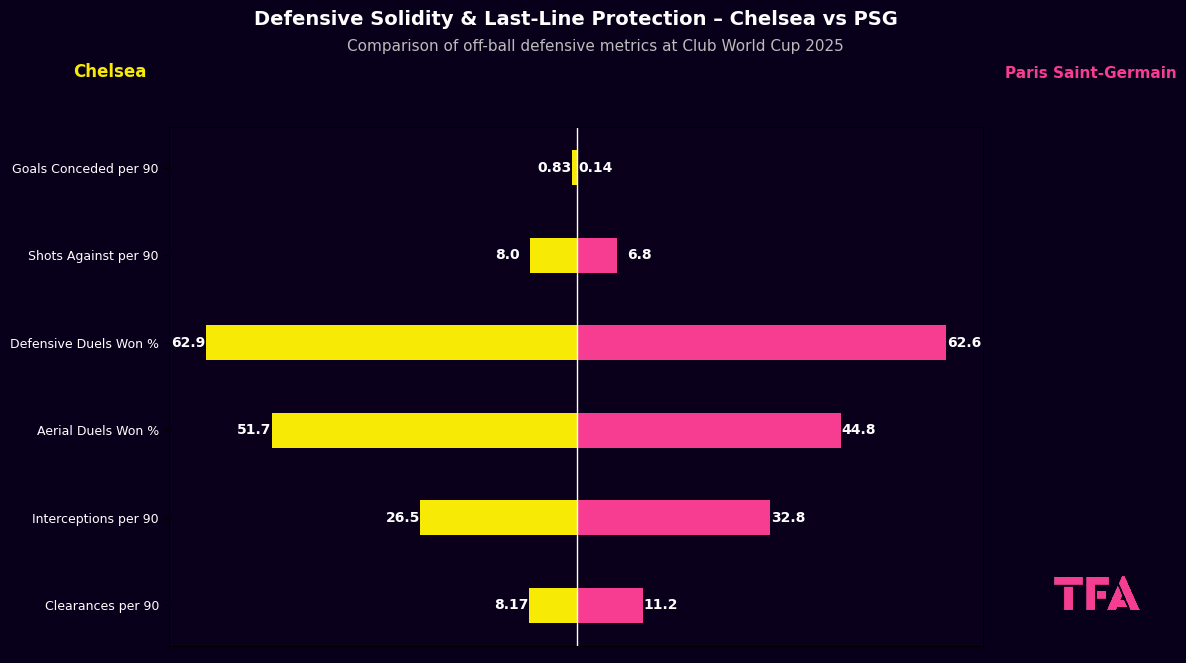

In [ ]:
data = {
    "Metric": [
        "Goals Conceded per 90", "Shots Against per 90",
        "Defensive Duels Won %", "Aerial Duels Won %",
        "Interceptions per 90", "Clearances per 90"
    ],
    "Chelsea": [0.83, 8, 62.9, 51.7, 26.5, 8.17],
    "PSG": [0.14, 6.8, 62.6, 44.8, 32.8, 11.2]
}

df = pd.DataFrame(data)
df = df[::-1]

fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#0A001B")

y_pos = range(len(df))

ax.barh(y_pos, df["Chelsea"], color="#F7EB06", height=0.4, align='center')
ax.barh(y_pos, [-val for val in df["PSG"]], color="#F73D92", height=0.4, align='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(df["Metric"], color="white", fontsize=9)
ax.tick_params(axis='x', colors='white')
ax.axvline(0, color='white', linewidth=1)

for i, val in enumerate(df["Chelsea"]):
    ax.text(val + 5.9, i, f"{val}", va='center', ha='left', color='white', fontsize=10, weight='bold')

for i, val in enumerate(df["PSG"]):
    ax.text(-val - 5.9, i, f"{val}", va='center', ha='right', color='white', fontsize=10, weight='bold')

ax.text(-max(df["PSG"]) - 10, len(df), "Paris Saint-Germain", ha='left', va='bottom', color="#F73D92", fontsize=11, weight='bold')
ax.text(max(df["Chelsea"]) + 10, len(df), "Chelsea", ha='right', va='bottom', color="#F7EB06", fontsize=12, weight='bold')

ax.set_xticks([])
ax.invert_xaxis()

plt.title("Defensive Solidity & Last-Line Protection – Chelsea vs PSG", color="white", fontsize=14, weight='bold', y=1.18)
plt.suptitle("Comparison of off-ball defensive metrics at Club World Cup 2025", y=0.89, fontsize=11, color="#BBBBBB")

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.20)
    ab = AnnotationBbox(imagebox, (0.96, 0.02), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()